# Playground

## Setup

In [40]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## What's inside processed data?

In [42]:
with open("data/processed/Mouse28-140313_processed.pkl", "rb") as f:
    data = pkl.load(f)

In [43]:
data.keys()

dict_keys(['session', 'state_times', 'angle_list', 'pos_sampling_rate', 'angle_times', 'nShanks', 'nCells', 'spike_times', 'cells_with_weird_clustering'])

In [59]:
for k,v in data.items():
    if type(v) not in [list, dict, np.ndarray]:
        print(f"{k}: {v}")

session: Mouse28-140313
pos_sampling_rate: 39.0625
nShanks: 11
cells_with_weird_clustering: 0


In [44]:
data['state_times'].keys()

dict_keys(['Wake', 'REM', 'SWS'])

### state_times

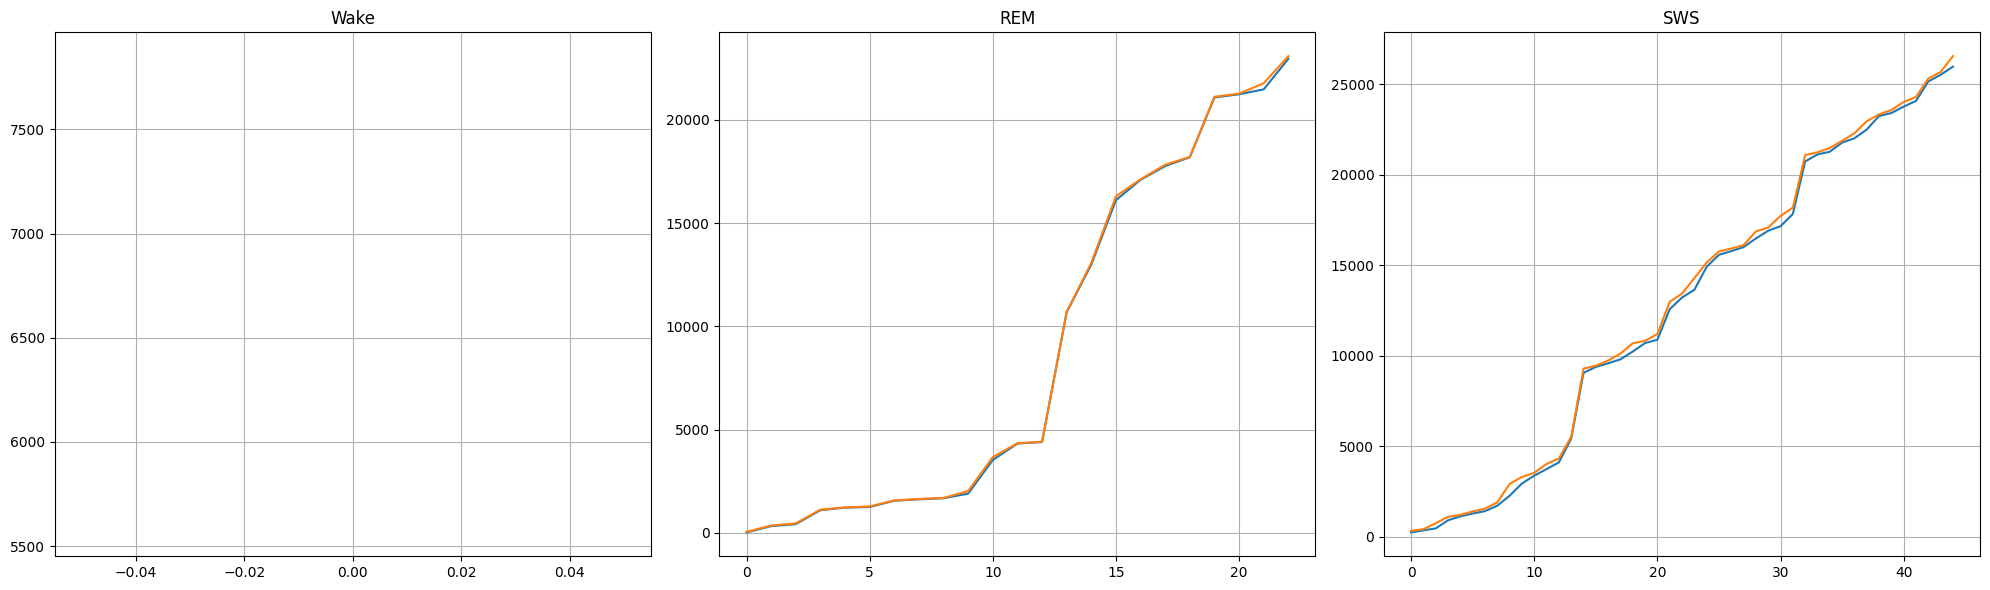

In [45]:
fig, axes = plt.subplots(1,3, figsize = (20,6))
for ax, key in zip(axes.flatten(), data["state_times"]):    
    ax.plot(data["state_times"][key])
    ax.set_title(key)
    ax.grid()
plt.tight_layout()

### angle_list

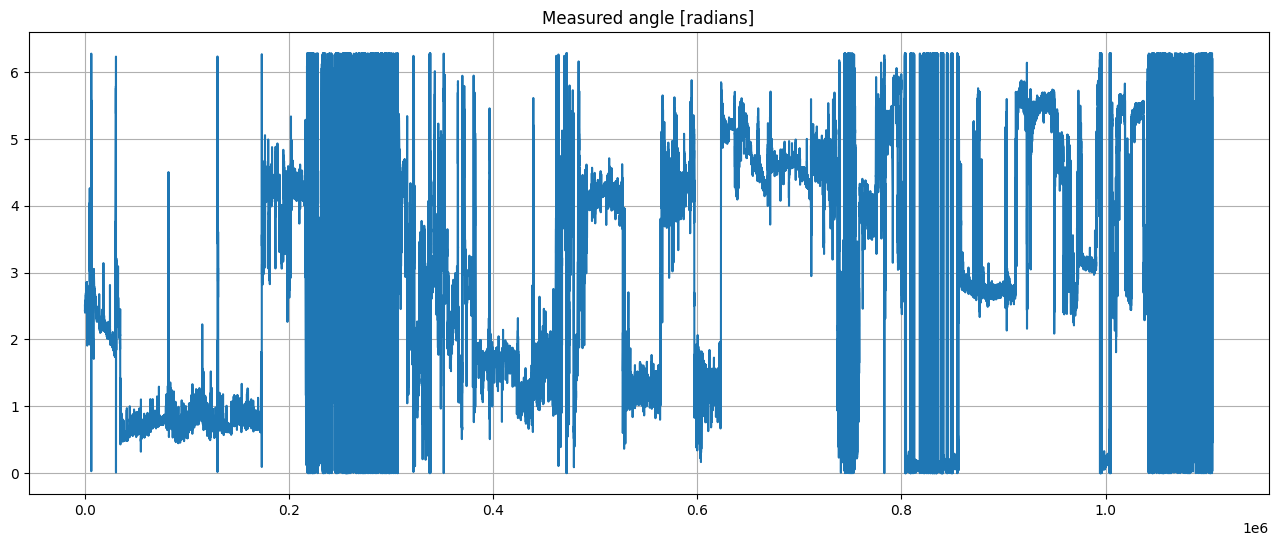

In [46]:
angles = pd.Series(data["angle_list"]).dropna()
fig, ax = plt.subplots(1,1,figsize = (16,6))
ax.plot(angles)
ax.grid()
ax.set_title("Measured angle [radians]")
plt.show()

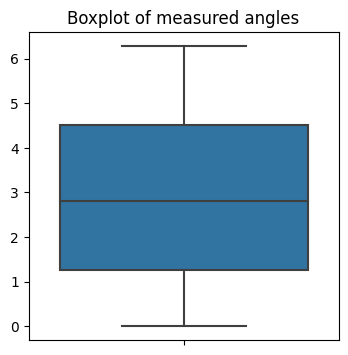

In [55]:
fig, ax = plt.subplots(1,1,figsize = (4,4))
sns.boxplot(y =angles)
plt.title('Boxplot of measured angles')
plt.show()

In [56]:
2*np.math.pi - angles.max()

8.530717958610268e-05

### nCells

In [61]:
pd.Series(data["nCells"]).isna().sum()

0

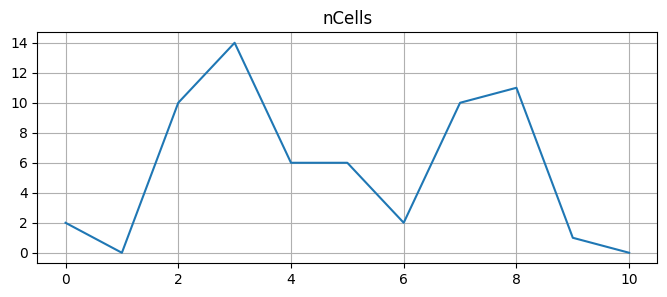

In [63]:
ncells = pd.Series(data["nCells"])
fig, ax = plt.subplots(1,1,figsize = (8,3))
ax.plot(ncells)
ax.grid()
ax.set_title("nCells")
plt.show()

### spike_times

In [69]:
data["spike_times"].keys()

dict_keys([(0, 0), (0, 1), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (6, 0), (6, 1), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 0)])

In [73]:
data["spike_times"].keys().__len__()

62

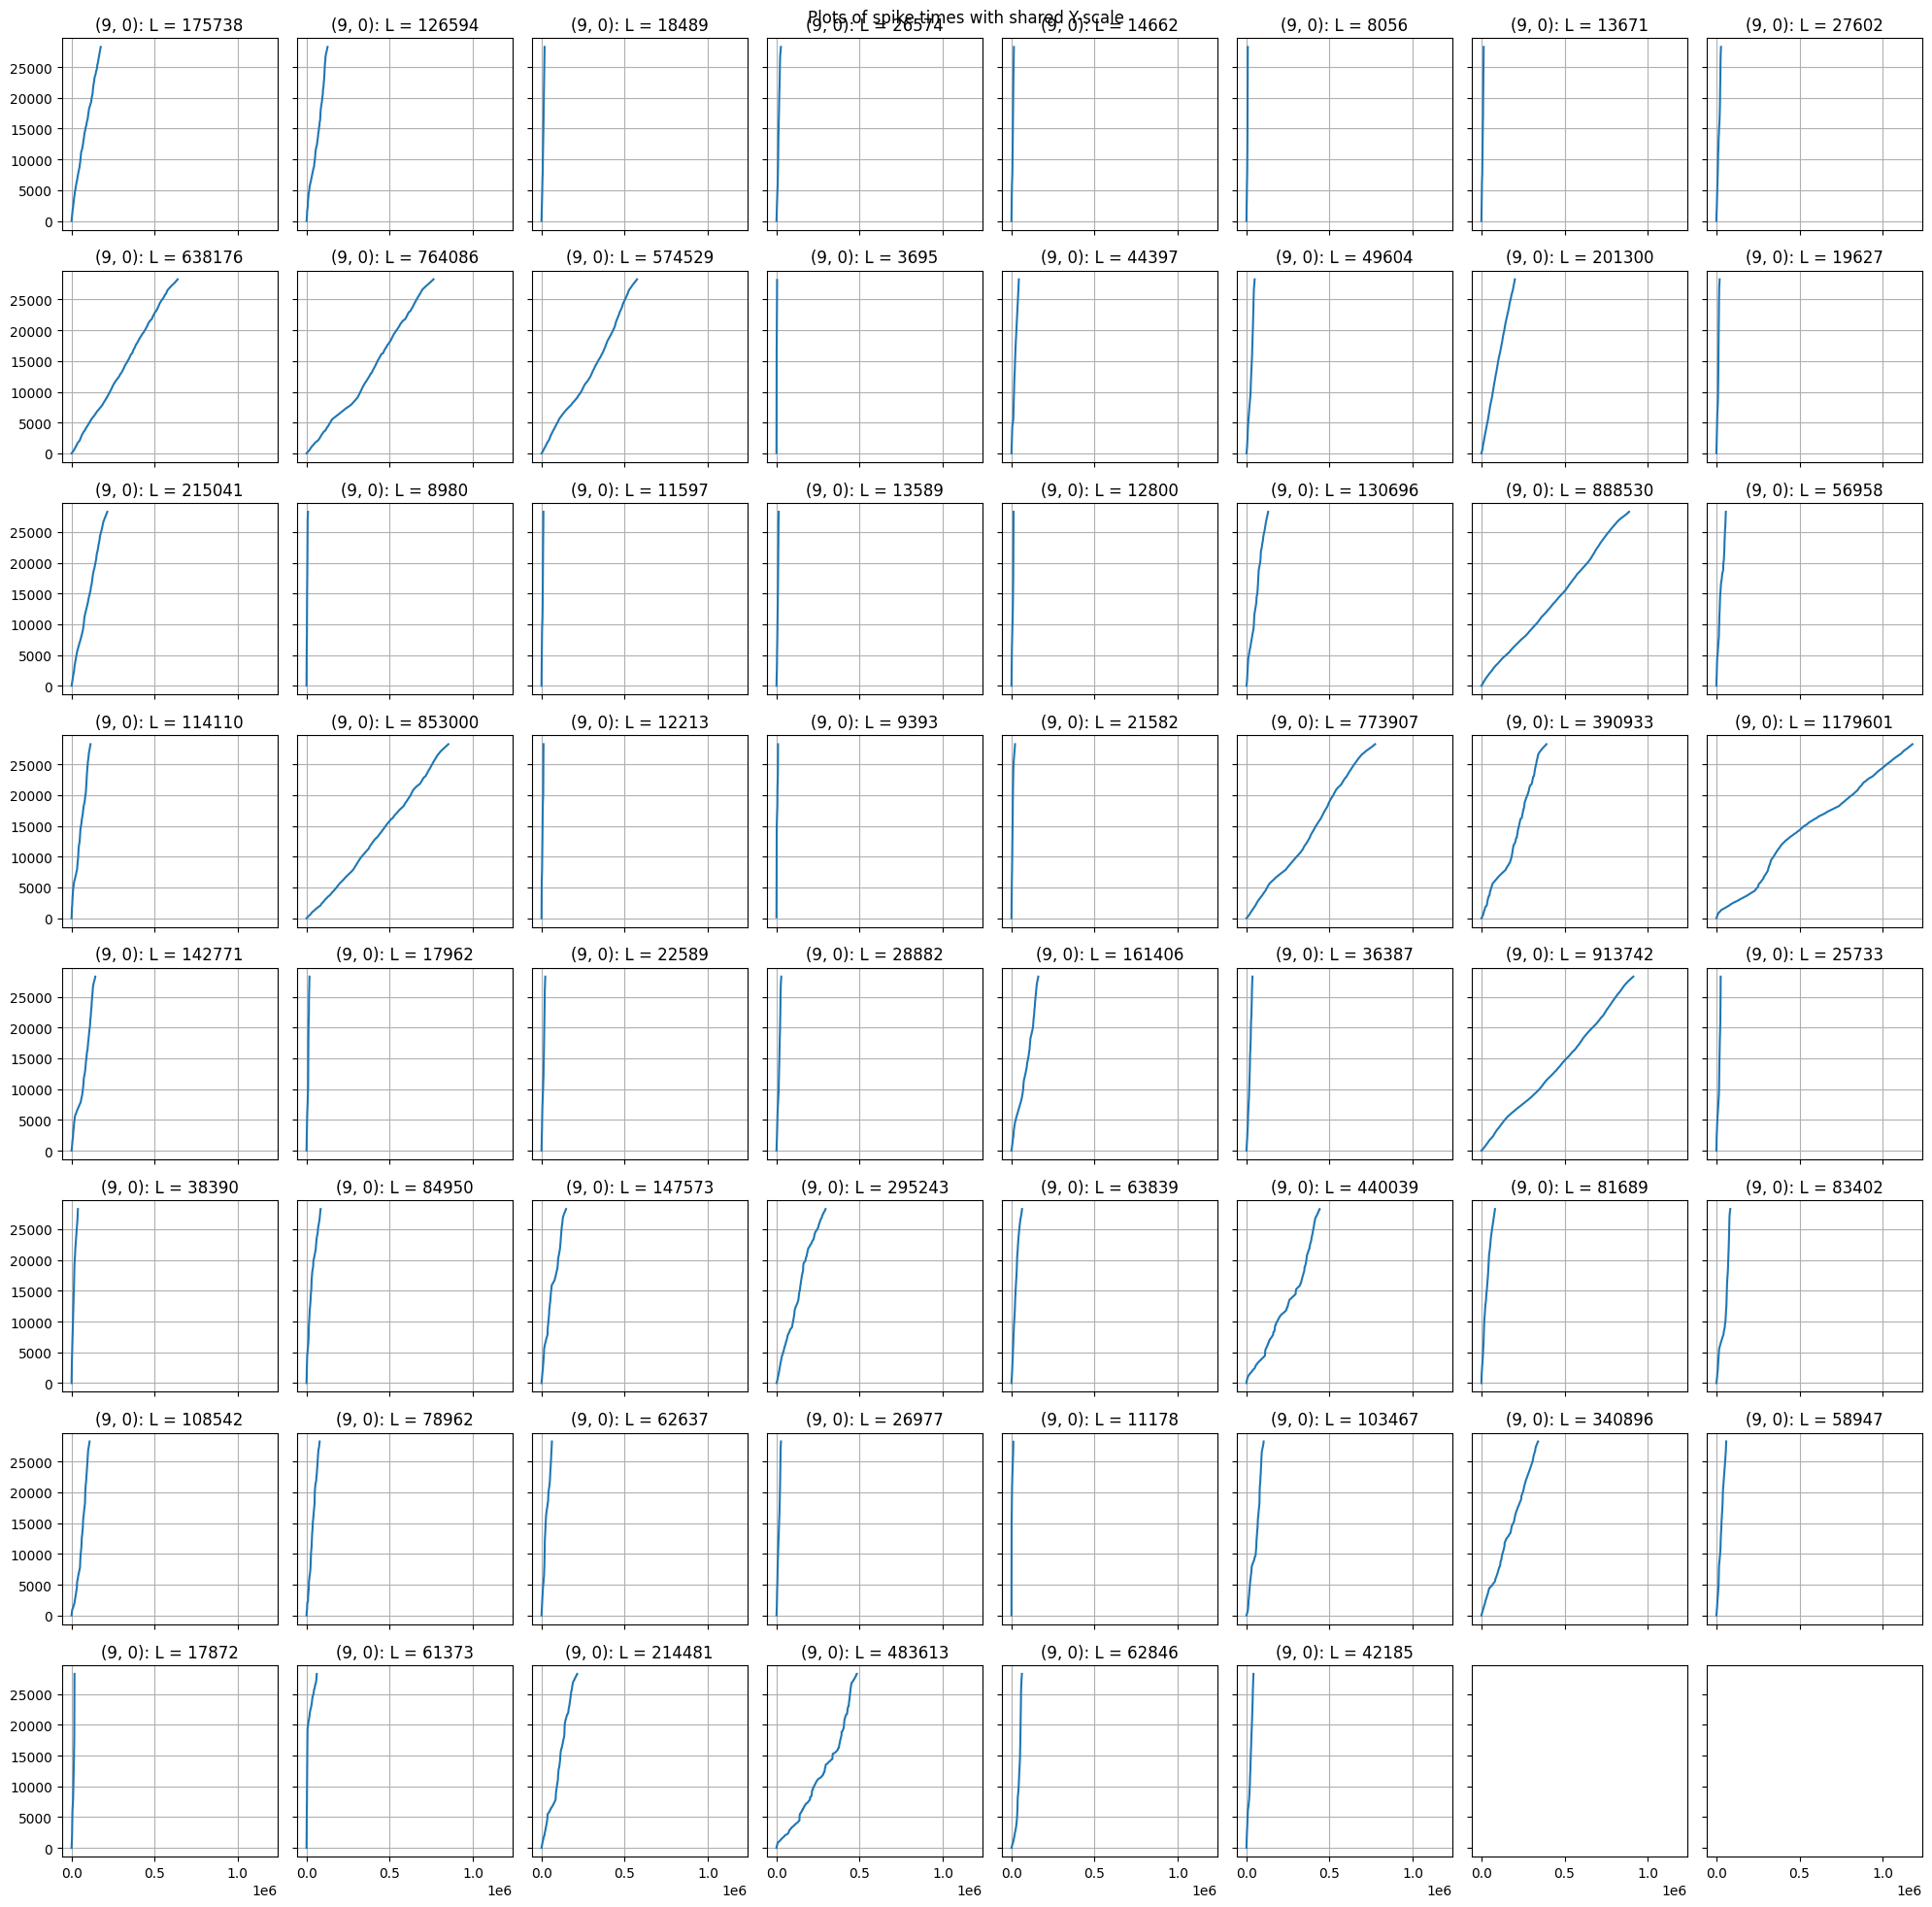

In [78]:
fig, axes = plt.subplots(8,8,figsize = (20,20), sharey = True, sharex = True)
for ax, key in zip(axes.flatten(), data["spike_times"].keys()):
    try:
        spikes = pd.Series(data["spike_times"][key])
        ax.plot(spikes)
        ax.grid()
        ax.set_title(f"{k}: L = {len(spikes)}")
    except Exception as e:
        print(f"Error with key {key} or ax {ax}: {e}")
        ax.set_visible(False)

plt.suptitle("Plots of spike times with shared scales")
plt.tight_layout()

## What's inside kernel_rates file?

In [80]:
with open("data/analyses/kernel_rates/100ms_sigma/Mouse28-140313_kernel_rates.pkl", "rb") as f:
    rates = pkl.load(f)

In [82]:
rates.keys()

dict_keys(['Wake', 'session', 'cells', 'params'])

### Wake

In [88]:
rates["Wake"].keys()

dict_keys([(5565.0, 7851.4)])

In [92]:
rates["Wake"][(5565.0, 7851.4)].keys()

dict_keys(['rates', 'rate_times', 'angles', 'angle_times'])

TypeError: float() argument must be a string or a number, not 'dict'

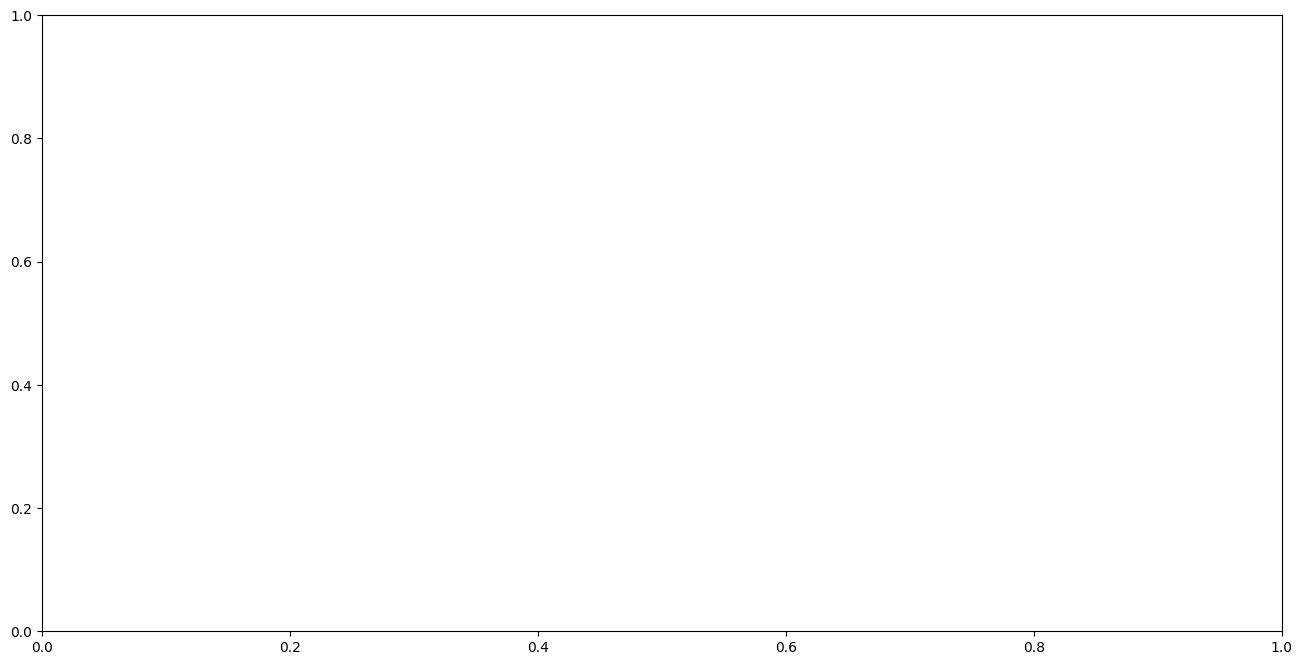

In [90]:
fig, ax = plt.subplots(1,1,figsize = (16,8))
ax.plot(rates["Wake"][(5565.0, 7851.4)])

plt.suptitle("Plots of rates with Wake key")
plt.tight_layout()